**Data Loading (ETL)**


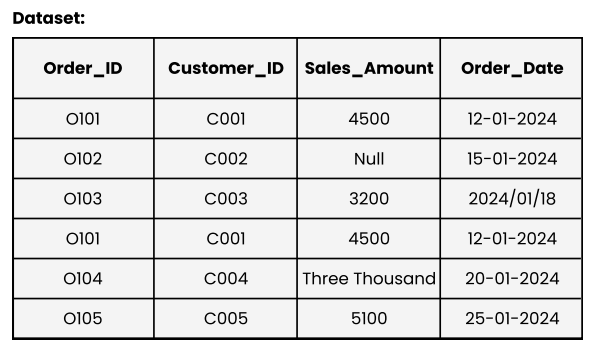

**Q1. Data Understanding**

**Identify all data quality issues present in the dataset that can cause problems during data loading**

**Ans:**

Data Quality Issues in the Dataset

**1.Duplicate Records**

* Order_ID O101 appears twice.

 * Can cause duplicate entries and primary key violations during data loading.

**2.Missing / NULL Values**

* Sales_Amount for Order_ID O102 is NULL.

* May create issues in calculations and violate NOT NULL constraints.

**3.Inconsistent Data Types**

* Sales_Amount column contains both numeric values (4500, 3200, 5100) and text ("Three Thousand").

* Prevents proper numeric data type assignment.

**4.Inconsistent Date Formats**

* Dates appear in different formats:

* 12-01-2024 (DD-MM-YYYY)

* 2024/01/18 (YYYY/MM/DD)

Can cause parsing errors during loading.

**5.Potential Data Standardization Issues**

Lack of consistent formatting and validation rules across fields.

These issues can lead to data load failures, incorrect aggregations, and constraint violations


**Q2. Primary Key Validation**

**Assume Order_ID is the Primary Key.**

**a) Is the dataset violating the Primary Key rule?**

**b) Which record(s) cause this violation?**

**ANS:**



a) Yes. The dataset violates the Primary Key rule because a Primary Key must contain unique values, and there is a duplicate Order_ID.

b)
Order_ID **O101** appears twice:

* O101 | C001 | 4500 | 12-01-2024
* O101 | C001 | 4500 | 12-01-2024

These duplicate records cause the Primary Key violation.

**Q3. Missing Value Analysis**

**Which column(s) contain missing values?**

**a) List the affected records**

**b) Explain why loading these records without handling missing values is risky**

**ANS:**

The Sales_Amount column contains missing values.

a)Order_ID: O102 | Customer_ID: C002 | Sales_Amount: NULL | Order_Date: 15-01-2024

b)* May cause errors if the column has a NOT NULL constraint.

* Aggregations like SUM, AVG, or calculations may produce incorrect or incomplete results.

* Can impact reporting accuracy and business analysis.

* May create issues in data validation rules or downstream processes.

**Q4. Data Type Validation**

**Identify records where Sales_Amount violates expected data type rules.**

**a) Which record(s) will fail numeric validation?**

**b) What would happen if this dataset is loaded into a SQL table with Sales_Amount as DECIMAL?**

**ANS:**

a) Order_ID: O104 | Customer_ID: C004 | Sales_Amount: "Three Thousand" | Order_Date: 20-01-2024

This record contains text instead of a numeric value.

b)
* The record will fail to load because text cannot be converted into a DECIMAL data type.

* SQL may throw a data type conversion error.

* Depending on the loading method:

  * The entire load may fail, or

  * The invalid row may be rejected or skipped.

**Q5. Date Format Consistency**

**The Order_Date column has multiple formats.**

**a) List all date formats present in the dataset**

**b) Why is this a problem during data loading?**

**ANS:**

a) DD-MM-YYYY → e.g., 12-01-2024, 15-01-2024, 20-01-2024

   YYYY/MM/DD → e.g., 2024/01/18

b) SQL may fail to parse dates correctly due to inconsistent formats.

Dates can be misinterpreted depending on system locale settings.

Data type conversion errors may occur when loading into DATE columns.

Can lead to incorrect sorting, filtering, and date-based calculations.

**Q6. Load Readiness Decision**

**Based on the dataset condition:**

**a) Should this dataset be loaded directly into the database? (Yes/No)**

**b) Justify your answer with at least three reasons**

**ANS:**

a) NO.

b) Duplicate Primary Key values

   * Order_ID O101 is duplicated, which violates the primary key constraint.

   Missing values (NULL)

* Sales_Amount contains NULL, which may cause errors if the column requires mandatory data and can affect calculations.

Invalid data type values

 * Sales_Amount includes text (Three Thousand) instead of numeric data, which will fail numeric validation.

Inconsistent date formats

* Multiple date formats can cause parsing errors during loading into DATE columns.

Because of these data quality issues, data cleaning and validation are required before loading.

**Q7. Pre-Load Validation Checklist**

**List the exact pre-load validation checks you would perform on this dataset before loading.**

**ANS:**


Before loading the dataset, the following pre-load validation checks should be performed:

1. **Primary Key Validation**

   * Check for duplicate Order_ID values.
   * Ensure Order_ID is unique and not NULL.

2. **Missing Value Check**

   * Identify NULL or empty values, especially in Sales_Amount.
   * Decide whether to fill, remove, or reject incomplete records.

3. **Data Type Validation**

   * Ensure Sales_Amount contains only numeric values.
   * Remove or correct text values like “Three Thousand”.

4. **Date Format Standardization**

   * Convert all Order_Date values into a consistent format (e.g YYYY-MM-DD).

5. **Data Range and Business Rule Validation**

   * Check that Sales_Amount values are positive and reasonable.

6. **Column Format Consistency**

   * Verify consistent formatting across all rows no mixed data types.

7. **Duplicate Record Check**

   * Identify and remove exact duplicate rows.

These validations help prevent load failures and ensure data accuracy and consistency.

**Q8. Cleaning Strategy**

**Describe the step-by-step cleaning actions required to make this dataset load-ready.**

**ANS:**

The following step-by-step cleaning actions should be performed to make the dataset load-ready:

1. **Remove Duplicate Records**

   * Identify duplicate Order_ID values (e.g. O101).
   * Keep one valid record and remove duplicates to maintain primary key uniqueness.

2. **Handle Missing Values**

   * Check rows where Sales_Amount is NULL.
   * Either:

     * Fill with correct value if known, or
     * Apply a default value, or
     * Remove the record based on business rules.

3. **Fix Data Type Issues**

   * Replace text values like “Three Thousand” with proper numeric values (e.g. 3000).
   * Ensure Sales_Amount contains only numeric data.

4. **Standardize Date Format**

   * Convert all Order_Date values into a consistent format ( YYYY-MM-DD).

5. **Validate Data Types**

   * Ensure columns match expected types:

     * Order_ID → Text/String
     * Customer_ID → Text/String
     * Sales_Amount → Numeric/Decimal
     * Order_Date → Date

6. **Apply Validation Rules**

   * Ensure Sales_Amount is positive.
   * Confirm no required fields are empty.

7. **Final Data Quality Check**

   * Re-check duplicates, NULL values, and format consistency before loading into the database.

**Q9. Loading Strategy Selection**

**Assume this dataset represents daily sales data.**

**a) Should a Full Load or Incremental Load be used?**

**b) Justify your choice.**

**ANS:**


a)
Incremental Load

b) Justification:

1. **Daily sales data is updated regularly**

   * Only new or changed records need to be added each day.

2. **Improves performance**

   * Loading only new records reduces processing time compared to reloading the entire dataset.

3. **Prevents duplication**

   * Incremental loading helps avoid reloading existing records if proper key checks are used.

4. **Efficient resource usage**

   * Minimizes database load and storage usage by processing only required data.


**Q10. BI Impact Scenario**

**Assume this dataset was loaded without cleaning and connected to a BI dashboard.**

**a) What incorrect results might appear in Total Sales KPI?**

**b) Which records specifically would cause misleading insights?**

**c) Why would BI tools not detect these issues automatically?**

**ANS:**


a)

* Total Sales may be **higher than actual** due to duplicate records being counted twice.
* Total Sales may be **lower than actual** because:

  * NULL values are ignored in calculations.
  * Non-numeric values may be excluded from aggregation.
* Incorrect trends or performance insights may appear in reports.



b)

* **Order_ID O101** — duplicate record causing double counting.
* **Order_ID O102** — missing Sales_Amount (NULL), leading to incomplete totals.
* **Order_ID O104** — text value (Three Thousand) may be excluded or cause calculation errors.



c)

* BI tools mainly visualize and aggregate existing data rather than enforce strict data validation rules.
* They assume source data is already cleaned and structured correctly.
* Data quality checks like primary key validation, type enforcement, and standardization typically occur during ETL or database preparation, not within dashboards.











